# 7. Monte Carlo methods

In previous sections we have encountered certain methods like gradient ascent/descent and the EM algorithm, which allow us to find approximate solutions to problems in which an exact solution cannot be found. This section deals with another class of methods referred to broadly as Monte Carlo, which use random sampling to obtain approximate answers to analytically intractable or otherwise difficult problems. Two useful applications of MC are evaluating integrals and sampling from intractable distributions.

\begin{align}
A= \int f(x) dx = \int e^{-\frac{1}{10}x^4 - \frac{1}{10}x^3 - \frac{1}{2}x^2} dx.
\end{align}

In [1]:
# The usual notebook preferences
%config InlineBackend.figure_format = 'svg'
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from helper_functions import *
set_notebook_preferences()

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

/home/hugh/.local/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['Georgia'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


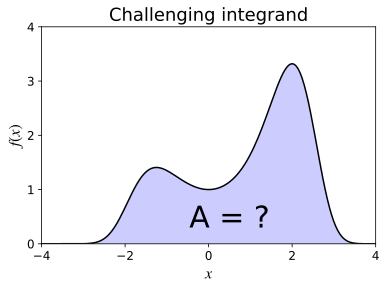

In [3]:
x = np.linspace(-5, 5, 200)
y = np.exp(-(0.1*x**4 - 0.1*x**3 - 0.5*x**2))

plt.plot(x, y, color = 'black')
plt.fill_between(x, y, np.zeros_like(y), facecolor = 'blue', alpha = 0.2)
beautify_plot({"title": "Challenging integrand","x":"$x$", "y":"$f(x)$"})
plt.xlim([-4, 4]), plt.ylim([0, 4])
plt.xticks(np.arange(-4, 5, 2)), plt.yticks(np.arange(5))
plt.text(0.5, 0.3, "A = ?", fontsize = 30, horizontalalignment='center')
plt.show()

Instead of searching for an analytic solution we can approximate this integral using MC. Another application of MC is in sampling probability distributions. As we shall see, given a probability distribution function (PDF) $p(x)$ and corresponding cumulative ditribution function (CDF) $h(x)$, we can easily draw random samples of $x$ provided we can calculate the CDF's inverse, $h^{-1}(x)$. In many cases $h^{-1}(x)$ is analytically intractable and an alternative is required. The aforementioned integrand is such an example of an intractable distribution:

\begin{align}
p(x) = \frac{e^{-\frac{1}{10}x^4 - \frac{1}{10}x^3 - \frac{1}{2}x^2}}{\int e^{-\frac{1}{10}x^4 - \frac{1}{10}x^3 - \frac{1}{2}x^2} dx}.
\end{align}

/home/hugh/.local/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['Georgia'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


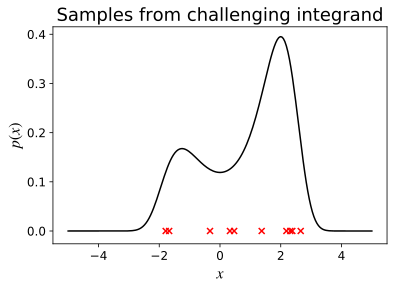

In [4]:
np.random.seed(1)
x_ = np.linspace(-4, 4, 100)
y_prob = np.exp(-(0.1*x_**4 - 0.1*x_**3 - 0.5*x_**2))
width = 2
mean = 1
height = 20
y_approx = height/(width**2 + (x_ - mean)**2)

no_samples = 30
cdf_samples = np.random.rand(no_samples)
u = np.random.rand(no_samples)
pdf_samples = width*np.tan(np.pi*cdf_samples - np.pi/2) + mean
Mq = height/(width**2 + (pdf_samples - mean)**2)
p = np.exp(-(0.1*pdf_samples**4 - 0.1*pdf_samples**3 - 0.5*pdf_samples**2))
samples_kept = pdf_samples[np.where(Mq*u < p)]

x = np.linspace(-5, 5, 200)
y = np.exp(-(0.1*x**4 - 0.1*x**3 - 0.5*x**2))/8.4

plt.plot(x, y, color = 'black')
plt.scatter(samples_kept, np.zeros_like(samples_kept), marker = 'x', color = 'red')
beautify_plot({"title": "Samples from challenging integrand","x":"$x$", "y":"$p(x)$"})
plt.yticks(np.linspace(0, 0.4, 5))
plt.show()

Here the distribution $p(x)$ has assumed to normalised, however we will present methods which can accomodate for unormalised distributions. In particular we will look at rejection and importance sampling, both of which are MC methods allowing us to circumvent the analytic intractabilities as well as handling unormalised distributions.

**Perhaps add a word on MCMC but was not sure if it's appropriate**
